In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Projeto 1:

definindo a função para o metodo Analitico:

In [14]:
def matriz_defeituosa(A):
    linhas, colunas = np.shape(A)
    if linhas != colunas:
        return True
    auto_valores, auto_vetores = np.linalg.eig(A)
    if not np.all(np.isreal(auto_valores)):
        return True
    autovalores_unicos = np.unique(auto_valores)
    if len(auto_valores) != len(autovalores_unicos):
        return True
    else:
        pass

def EDO_solve(A,u0,h=0.01,num_inter=100):
    linhas, colunas = np.shape(A)
    if matriz_defeituosa(A):
        u_n = []
        epsilon=1e-5
        resultado = np.identity(colunas)
        for j in range(num_inter):
            i = 0
            t = h*j
            termo = np.identity(colunas)
            while np.max(np.abs(termo)) > epsilon:
                termo = np.dot(termo, A) * (t**i / np.math.factorial(i))
                resultado += termo
                i+=1
            u_n.append(resultado @ u0)
        return u_n
    else:
        alpha, S = np.linalg.eig(A)
        S_1 = np.linalg.inv(S)
        matriz_alpha = np.diag(alpha)
        u_n = []
        for j in range(num_inter):
            t = j * h
            for i in range(colunas):
                matriz_alpha[i, i] = np.exp(matriz_alpha[i, i] * t)
            u_t = S @ matriz_alpha @ S_1
            u_n.append(np.dot(u_t,u0))
            matriz_alpha = np.diag(alpha)
        return u_n

Definindo a função para o metodo numérico:

In [15]:
def FE(A, u0, h=0.01, num_inter=100):
    resultados = []
    u = u0
    for _ in range(num_inter):
        u_1 = u + h * np.dot(A, u)
        resultados.append(u_1)
        u = u_1
    return resultados

# Testando para matriz defeituosa:

True
[0.99, 1.9899005000000833, 2.999703500005417, 4.019413990066166, 5.0490399503075, 6.088592351108583, 7.138085153490573, 8.197535309773587, 9.266962764562638, 10.346390456122545, 11.435844318202113, 12.535353282366444, 13.644949280899274, 14.76466725033381, 15.89454513567281, 17.034623895357882, 18.184947507048154, 19.34556297426851, 20.516520333987618, 21.697872665186154, 22.88967609847556, 24.091989826828, 25.30487611747805, 26.528400325057063, 27.76263090602125, 29.00763943443453, 30.26350061916783, 31.53029232257641, 32.80809558071737, 34.09699462516967, 35.397076906519466, 36.70843311957401, 38.03115723036779, 39.365346505026935, 40.71110154054907, 42.068526297577925, 43.43772813522635, 44.81881784802054, 46.211909705032326, 47.617121491268286, 49.03457455138569, 50.464393835806085, 51.90670794929878, 53.36164920210769, 54.82935366369646, 56.309961219188224, 57.80361562857796, 59.31046458879735, 60.83065979871363, 62.364357027146106, 63.91171618398604, 65.4729013945081, 67.048

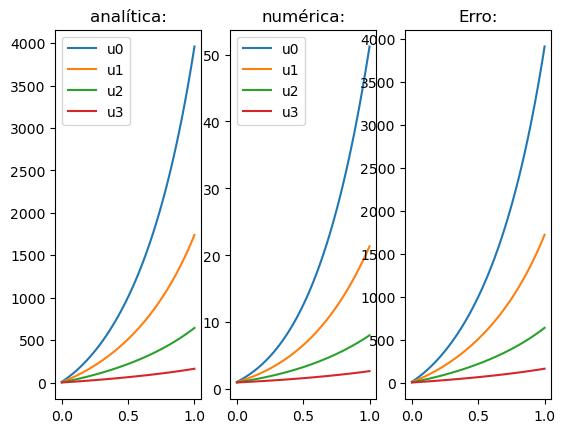

In [16]:
A_defeituosa = np.array([[1, 2, 3, 4],
                   [0, 1, 2, 3],
                   [0, 0, 1, 2],
                   [0, 0, 0, 1]])
print(matriz_defeituosa(A_defeituosa))
u0 = np.array([1,1,1,1])
resultado_EDO = EDO_solve(A_defeituosa, u0)
resultado_FE = FE(A_defeituosa, u0)
pontos = np.linspace(0,1,100)
fig,(x1,x2,x3)=plt.subplots(1,3)
for i in range(A_defeituosa.shape[0]):
    u_EDO = [x[i] for x in resultado_EDO]
    u_FE = [x[i] for x in resultado_FE]
    error = [abs(abs(u_EDO[i])-abs(u_FE[i])) for i in range(0,len(u_EDO))]
    x1.plot(pontos, u_EDO, label=f'u{i}')
    x2.plot(pontos, u_FE, label=f'u{i}')
    x3.plot(pontos, error)
print(error)
x1.set_title("analítica:")
x2.set_title("numérica:")
x3.set_title("Erro:")
x1.legend()
x2.legend()
plt.show()

# Testando para matriz não defeituosa:

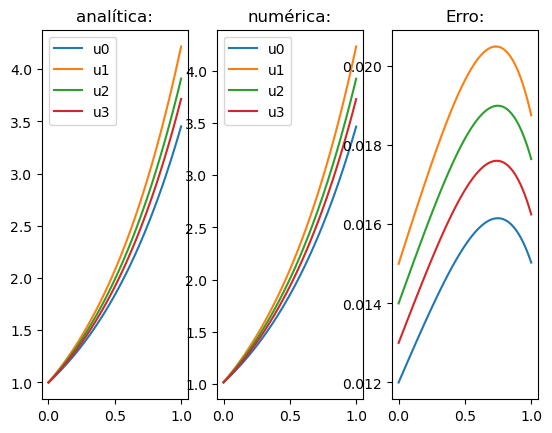

In [5]:
A_nao_defeituosa = np.array([[0.6, 0.2, 0.3, 0.1],
              [0.2, 0.9, 0.1, 0.3],
              [0.3, 0.1, 0.8, 0.2],
              [0.1, 0.3, 0.2, 0.7]])
u0 = np.array([1,1,1,1])
resultado_EDO = EDO_solve(A_nao_defeituosa, u0)
resultado_FE = FE(A_nao_defeituosa, u0)
pontos = np.linspace(0,1,100)
fig,(x1,x2,x3)=plt.subplots(1,3)
for i in range(A_nao_defeituosa.shape[0]):
    u_EDO = [x[i] for x in resultado_EDO]
    u_FE = [x[i] for x in resultado_FE]
    error = [abs(abs(u_EDO[i])-abs(u_FE[i])) for i in range(0,len(u_EDO))]
    x1.plot(pontos, u_EDO, label=f'u{i}')
    x2.plot(pontos, u_FE, label=f'u{i}')
    x3.plot(pontos, error)
x1.set_title("analítica:")
x2.set_title("numérica:")
x3.set_title("Erro:")
x1.legend()
x2.legend()
plt.show()